In [2]:
import PracticalEstimators
import numpy as np
import matplotlib.pyplot as plt


In [7]:
import datagen


Signal Power: 0.15340184733213522
Noise Power: 0.9701984696939426
Signal Power: 0.1511711269319897
Noise Power: 0.9560901551190188
Signal Power: 0.15635614628529734
Noise Power: 0.9888830968560298
Signal Power: 0.15533709702940218
Noise Power: 0.9824380634629729
Signal Power: 0.16512965684552233
Noise Power: 1.0443716497477318
Signal Power: 0.15491669603273892
Noise Power: 0.9797792141028512
Signal Power: 0.14844117227821524
Noise Power: 0.9388244058892115
Signal Power: 0.16216110241637194
Noise Power: 1.0255968630391388
Signal Power: 0.1508670780586318
Noise Power: 0.9541671811993807
Signal Power: 0.16509652171347494
Noise Power: 1.0441620847720512
Signal Power: 0.15028576472897584
Noise Power: 0.9504906328875226
Signal Power: 0.15343998303675582
Noise Power: 0.9704396610674959
Signal Power: 0.1592742774784317
Noise Power: 1.0073389790190086
Signal Power: 0.17163172969630586
Noise Power: 1.0854943691893717
Signal Power: 0.16216530811971977
Noise Power: 1.0256234622426232
Signal Power:

In [4]:
X = np.load("Noisy.npy")
y = np.load("Params.npy")

In [7]:

resultsFreqPractical = np.zeros((y.shape[0],1))
resultsAmpPractical = np.zeros((y.shape[0],1),dtype=complex)
index = 0
for x in X:
    # print(x.shape)
    resultsFreqPractical[index] = PracticalEstimators.EstimateFrequency(x)
    resultsAmpPractical[index] = PracticalEstimators.EstimateAmplitude(x)
    index = index + 1


In [5]:

PracticalAmpMSE = np.zeros((25,1))


y_w = y[:,1]
 
from numpy import r_
Ns = 500
fs = 2048000
t = r_[0.0:Ns]/fs            # time points
index = 0
for SNR in np.arange(-5,20):
    runningTotal = 0
    for i in range(1000):
            
        # temp1 = resultsFreqPractical[index]
        # temp2 = y_w[index] * 2 * np.pi / 2048000 

        temp1 = resultsAmpPractical[index] 
        temp2 = y[index,1] *np.exp(-1j *( 2*np.pi*index*y[index,0]/fs + y[index,2]) )
        # print(temp2)
        error = np.abs(((temp1 - temp2)*np.conj((temp1 - temp2))))
        runningTotal = runningTotal + error    
        index = index + 1
    PracticalAmpMSE[SNR + 5] = runningTotal / 1000 
    # print( np.sqrt(runningTotal / 1000) )


plt.plot(np.sqrt(PracticalAmpMSE))

NameError: name 'resultsAmpPractical' is not defined

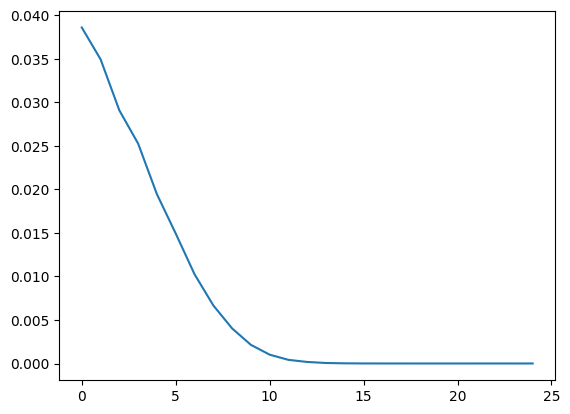

In [9]:

PracticalFreqMSE = np.zeros((25,1))


y_w = y[:,0]
 
index = 0
for SNR in np.arange(-5,20):
    runningTotal = 0
    for i in range(1000):
            
        # temp1 = resultsFreqPractical[index]
        # temp2 = y_w[index] * 2 * np.pi / 2048000 

        
        temp1 = resultsFreqPractical[index] 
        temp2 = y_w[index] * 2 * np.pi / 2048000
        # print(np.mean(temp1))
        # print(np.mean(temp2))
        # print(temp2)
        error = ((temp1 - temp2)) **2
        runningTotal = runningTotal + error    
        index = index + 1
    PracticalFreqMSE[SNR + 5] = runningTotal / 1000 
    # print( np.sqrt(runningTotal / 1000) )


plt.plot(PracticalFreqMSE)

In [10]:
X.shape

(25000, 500)

In [11]:
print(resultsFreqPractical)

[[ 0.07934611]
 [ 0.11909732]
 [-0.04896926]
 ...
 [ 0.23046073]
 [ 0.23208159]
 [ 0.22753304]]


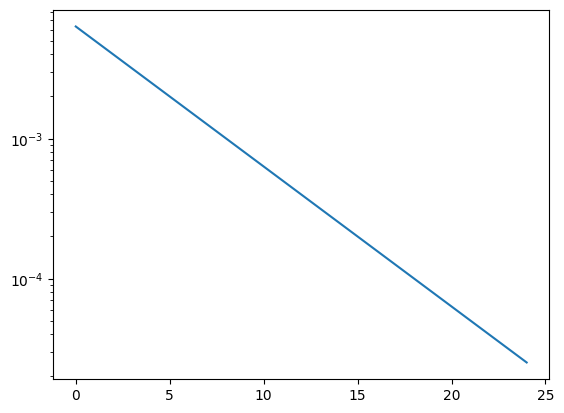

In [ ]:
plt.plot(CRLBAmpMSE)
# plt.plot(SNRs,MLFreqMSE)
ax = plt.gca()
ax.set_yscale('log')

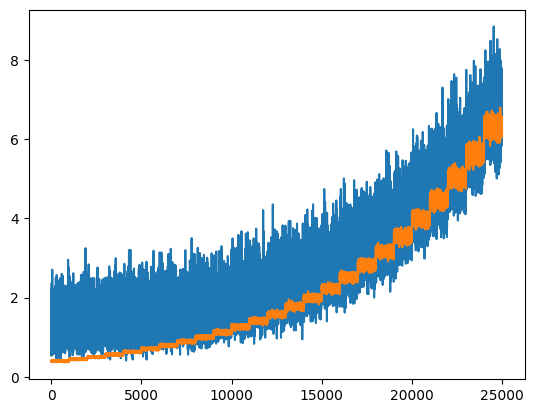

In [ ]:

plt.plot(np.abs(resultsAmpPractical))
plt.plot(y_w)

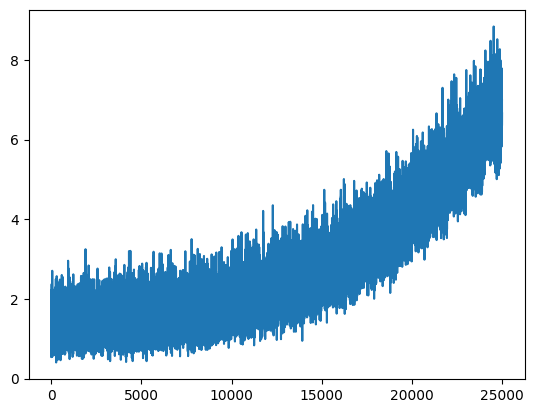

In [ ]:
plt.plot(np.abs(resultsAmpPractical))

In [ ]:
SNRs = np.arange(-5,20)
CRLBFreqMSE = np.zeros_like(SNRs,dtype=float) 
for SNR in SNRs:
    SNRLin = 10**(SNR/10)
    CRLBFreqMSE[SNR+5] = PracticalEstimators.CRLBFrequency(SNRLin,500)


CRLBAmpMSE = np.zeros_like(SNRs,dtype=float) 
for SNR in SNRs:
    SNRLin = 10**(SNR/10)
    
    CRLBAmpMSE[SNR+5] = PracticalEstimators.CRLBAmplitude(np.sqrt(1/SNRLin),500)

1.517899348478216e-07
1.2057103099658384e-07
9.577297421040307e-08
7.607517753884361e-08
6.042866148076595e-08
4.8000192000768e-08
3.812790777839662e-08
3.028607367934399e-08
2.405708344244284e-08
1.910922062345036e-08
1.517899348478216e-08
1.2057103099658382e-08
9.577297421040306e-09
7.60751775388436e-09
6.042866148076594e-09
4.800019200076801e-09
3.812790777839661e-09
3.0286073679343997e-09
2.405708344244284e-09
1.9109220623450367e-09
1.517899348478216e-09
1.205710309965838e-09
9.577297421040307e-10
7.60751775388436e-10
6.042866148076596e-10


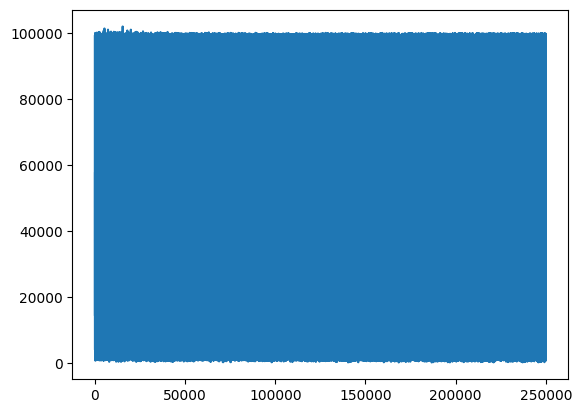

In [ ]:
plt.plot(resultsFreq)

(250000,)
(250000,)


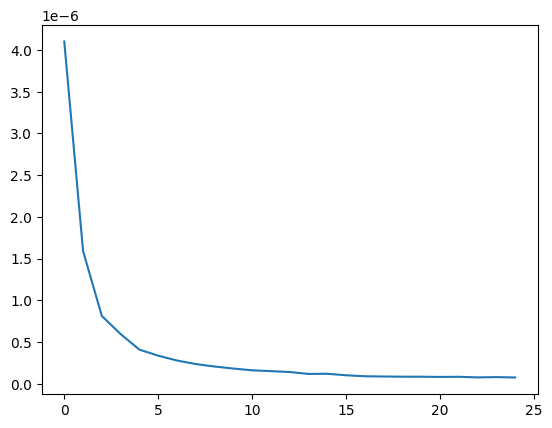

In [ ]:

resultsFreq = np.load("MLPreds.npy")[:,0] * 2 * np.pi / 2048000
y_w = np.load("MLParams.npy")[:,0]  * 2 * np.pi / 2048000
print(y_w.shape)
print(resultsFreq.shape)
MLFreqMSE = np.zeros((25,1))
index = 0
for SNR in np.arange(-5,20):
    SNRBin = SNR + 5
    temp1 = resultsFreq[10000*SNRBin:10000*SNRBin + 10000]
    # print(np.mean(temp1))
    temp2 = y_w[10000*SNRBin:10000*SNRBin + 10000]
    # print(np.mean(temp2))
    error = ((temp1 - temp2)) ** 2
    # print(error)
    # print(runningTotal)
    MLFreqMSE[SNR + 5] = np.sum(error) / 10000
plt.plot(MLFreqMSE)

(250000,)
(250000,)


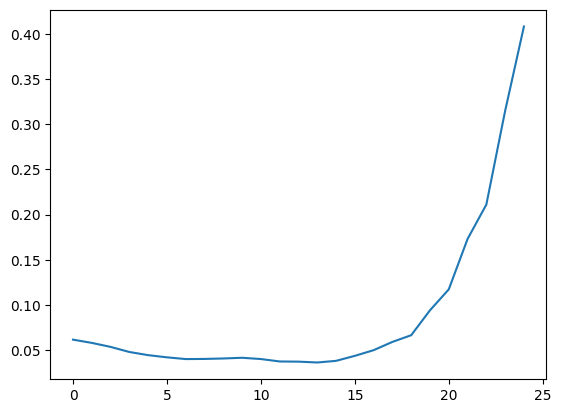

In [ ]:

resultsAmp = np.load("MLPreds.npy")[:,1]

y_w = np.load("MLParams.npy")[:,1]
print(y_w.shape)
print(resultsAmp.shape)
MLAmpMSE = np.zeros((25,1))
index = 0
for SNR in np.arange(-5,20):
    SNRBin = SNR + 5
    temp1 = resultsAmp[10000*SNRBin:10000*SNRBin + 10000]
    temp2 = y_w[10000*SNRBin:10000*SNRBin + 10000]
    error = ((temp1 - temp2)) **2
    # print(error)
    # print(runningTotal)
    MLAmpMSE[SNR + 5] = np.sum(error) / 10000
plt.plot(MLAmpMSE)

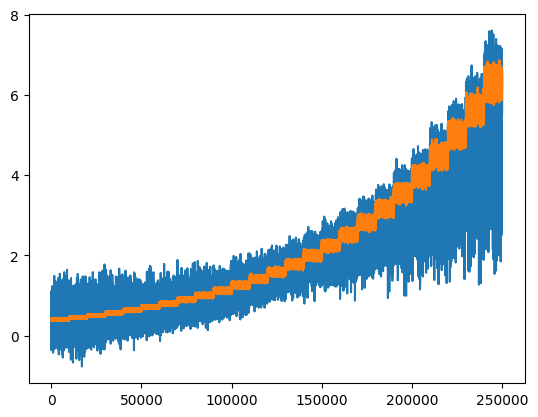

In [ ]:
plt.plot(resultsAmp)
plt.plot(y_w)

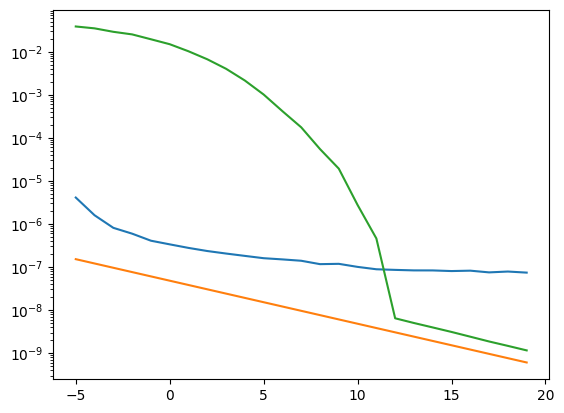

In [ ]:
plt.plot(SNRs,MLFreqMSE)
plt.plot(SNRs,CRLBFreqMSE)
plt.plot(SNRs,PracticalFreqMSE)
# plt.plot(SNRs,MLFreqMSE)
ax = plt.gca()
ax.set_yscale('log')

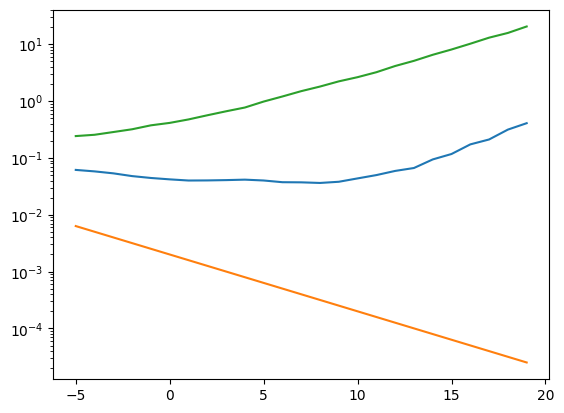

In [ ]:
plt.plot(SNRs,MLAmpMSE)
plt.plot(SNRs,CRLBAmpMSE)
plt.plot(SNRs,PracticalAmpMSE)
# plt.plot(SNRs,MLFreqMSE)
ax = plt.gca()
ax.set_yscale('log')

In [ ]:

from numpy import r_
Ns = 500
fs = 2048000
t = r_[0.0:Ns]/fs            # time points
y_ml = np.load("MLParams.npy")
preds = np.load("MLPreds.npy")

offset = 50000
for i in range(25):
    original = y_ml[i+ offset,1] * np.exp(1j *( 2*np.pi*y_ml[i+ offset,0]*t + y_ml[i+ offset,2]))
    predicted = preds[i+ offset,1] * np.exp(1j *( 2*np.pi*preds[i+ offset,0]*t + preds[i+ offset,2])) 
    plt.plot(original)
    plt.plot(predicted)
    plt.show()

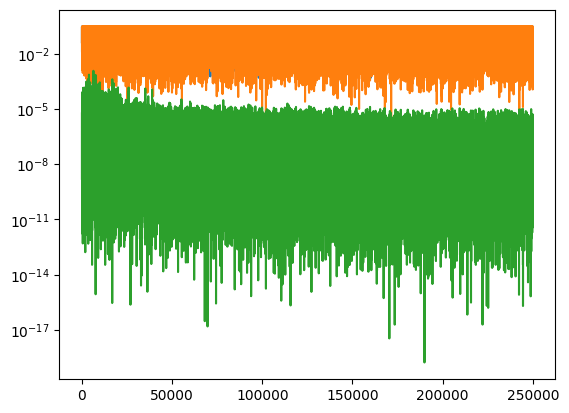

In [ ]:
plt.plot(resultsFreq)
plt.plot(y_w)
error = ((resultsFreq - y_w)) **2
plt.plot(error)

ax = plt.gca()
ax.set_yscale('log')

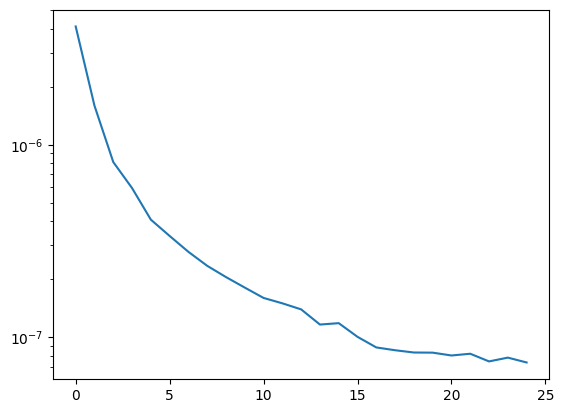

In [ ]:
plt.plot(MLFreqMSE)
ax = plt.gca()
ax.set_yscale('log')

In [ ]:

resultsFreq = np.load("MLPreds.npy")[:,1]

y_w = np.load("MLParams.npy")[:,1]
MLAmpMSE = np.zeros((25,1))
index = 0
for SNR in np.arange(-5,20):
    runningTotal = 0
    for i in range(1000):
        error = ((resultsFreq[index] - y_w[index])/ y_w[index]) **2
        # print(error)
        runningTotal = runningTotal + error    
        index = index + 1
    # print(runningTotal)
    MLAmpMSE[SNR + 5] = runningTotal / 1000 

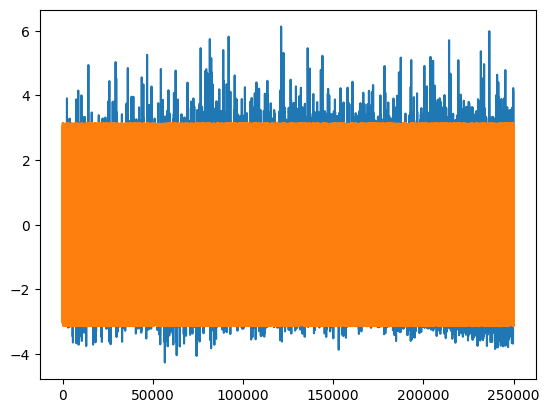

In [ ]:

resultsFreq = np.load("MLPreds.npy")[:,2]
y_w = np.load("MLParams.npy")[:,2]
plt.plot(resultsFreq)
plt.plot(y_w)

In [ ]:
Variance = RMSE ** 2 / 1000

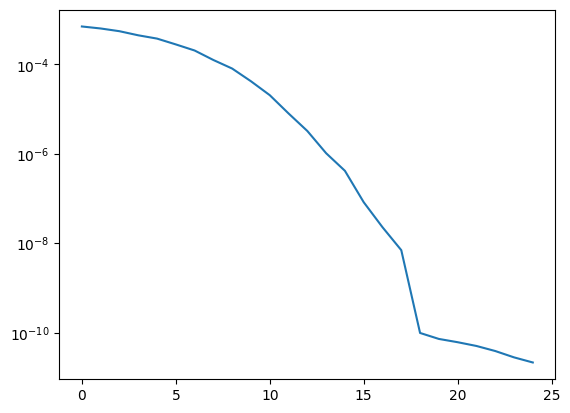

In [ ]:
plt.plot(Variance)
ax = plt.gca()
ax.set_yscale('log')

In [ ]:

# plt.plot(y_ml[:,1])
plt.plot(np.abs(results))
# plt.plot(y[:,0])

In [ ]:

plt.plot(y_ml[:,0])

In [ ]:
plt.plot(y[:,])